In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import imdb
from keras import models, layers, optimizers, losses, Input
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 8s 0us/step


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("\nSample Decoded Review:\n", decoded_review)

1641221/1641221 [==============================] - 0s 0us/step

Sample Decoded Review:
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film bu

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
model = models.Sequential([
    Input(shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 160465 (626.82 KB)
Trainable params: 160465 (626.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])

In [10]:
history = model.fit(partial_X_train, partial_y_train,
                    epochs=25,
                    batch_size=500)

Epoch 1/25
30/30 [==============================] - 6s 48ms/step - loss: 0.6263 - accuracy: 0.6337
Epoch 2/25
30/30 [==============================] - 1s 23ms/step - loss: 0.4885 - accuracy: 0.8385
Epoch 3/25
30/30 [==============================] - 0s 16ms/step - loss: 0.4236 - accuracy: 0.9104
Epoch 4/25
30/30 [==============================] - 1s 28ms/step - loss: 0.3841 - accuracy: 0.9407
Epoch 5/25
30/30 [==============================] - 1s 23ms/step - loss: 0.3573 - accuracy: 0.9552
Epoch 6/25
30/30 [==============================] - 1s 18ms/step - loss: 0.3363 - accuracy: 0.9663
Epoch 7/25
30/30 [==============================] - 1s 19ms/step - loss: 0.3202 - accuracy: 0.9743
Epoch 8/25
30/30 [==============================] - 0s 16ms/step - loss: 0.3065 - accuracy: 0.9793
Epoch 9/25
30/30 [==============================] - 1s 21ms/step - loss: 0.2961 - accuracy: 0.9837
Epoch 10/25
30/30 [==============================] - 0s 12ms/step - loss: 0.2875 - accuracy: 0.9849
Epoch 11/

In [11]:
pred_probs = model.predict(X_test)
y_pred = (pred_probs > 0.5).astype("int32").flatten()

782/782 [==============================] - 2s 2ms/step


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85624

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.86      0.86     12500
         1.0       0.86      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



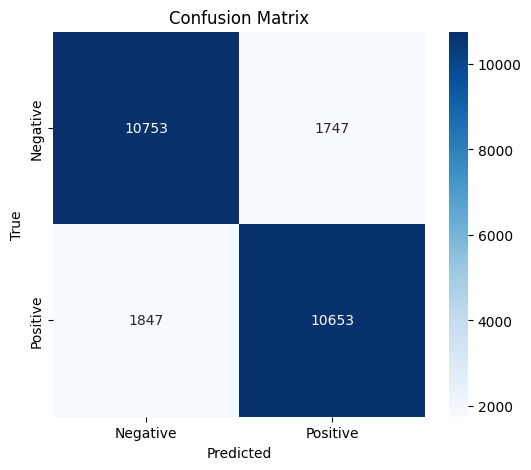

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()